<a href="https://colab.research.google.com/github/Sitimildaalkan/milda_PCD/blob/main/Tugas_SitiMildaAlkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Pemrosesan Gambar dengan Downsampling, Kuantisasi, dan Shrinking.
Lakukan pemrosesan gambar dengan menggunakan teknik downsampling, kuantisasi, dan shrinking. Anda akan menganalisis perbedaan yang terjadi pada gambar setelah dilakukan setiap proses, serta membandingkan data piksel dari gambar asli dan hasil pemrosesan.

In [11]:
# get image from link google image
import urllib.request
# from PIL import Image  # https://www.geeksforgeeks.org/python-pillow-a-fork-of-pil/
# https://media.geeksforgeeks.org/wp-content/uploads/20210318103632/gfg-300x300.png

urllib.request.urlretrieve(
    'https://onlinetools.com/images/examples-onlineimagetools/black-dog-gray-srgb.png', 'dog.png'
), # link from google image

# img = Image.open("gfg.png") #load image filename

(('dog.png', <http.client.HTTPMessage at 0x790a739c18d0>),)

Resolusi gambar: 427x640 piksel


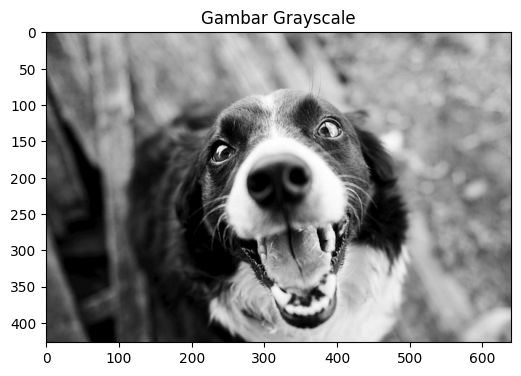

In [12]:
# load image

import cv2
import matplotlib.pyplot as plt
import numpy as np

# Membaca gambar
image = cv2.imread('dog.png', cv2.IMREAD_GRAYSCALE)


# Dapatkan resolusi gambar dalam piksel
width, height = image.shape
print(f"Resolusi gambar: {width}x{height} piksel")

# Menampilkan gambar
plt.figure(figsize=(6,6))
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.show()

Pemrosesan Gambar Dengan Downsampling

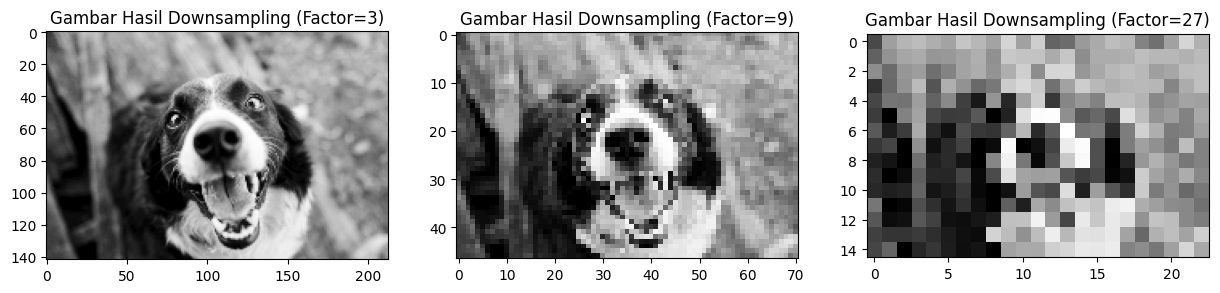

In [13]:
# Downsampling process
factors = 3**np.arange(1,4)
# factors = [1,2,3]
# print(factors)

#create a subplot for each sample
figure,axis = plt.subplots(1,len(factors),figsize=(15,5))

# loop over each sampling factor
for factor, ax in zip(factors,axis): # https://onlinetools.com/images/examples-onlineimagetools/black-dog-gray-srgb.png
    new_size = (image.shape[1] // factor, image.shape[0] // factor) # process downsampling -- baris dan colom
    downsampled_image = cv2.resize(image, new_size)
    ax.imshow(downsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Downsampling (Factor={factor})')
plt.show()

image size for factor 3 (1281, 1920)
image size for factor 9 (3843, 5760)
image size for factor 27 (11529, 17280)


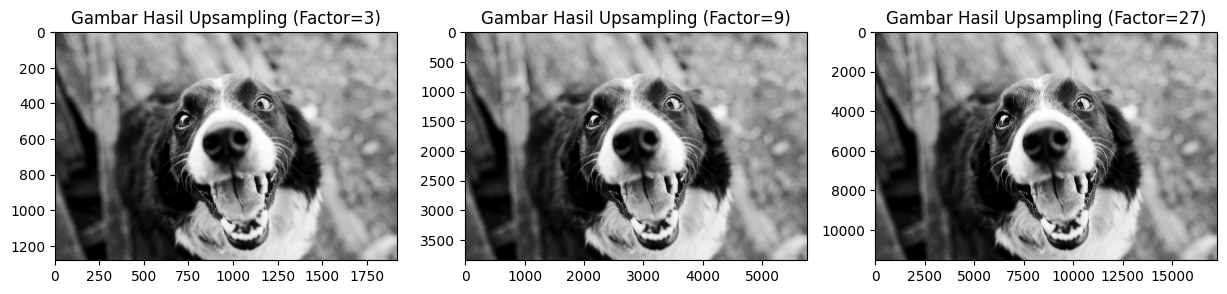

In [14]:
# upsampling process
factors = 3**np.arange(1,4)

figure,axis = plt.subplots(1,len(factors),figsize=(15,5))
for factor, ax in zip(factors,axis):
    new_size = (image.shape[1] * factor, image.shape[0] * factor) # process upsampling
    upsampled_image = cv2.resize(image, new_size)
    ax.imshow(upsampled_image, cmap='gray')
    ax.set_title(f'Gambar Hasil Upsampling (Factor={factor})')
    print(f'image size for factor {factor}', upsampled_image.shape)
plt.show()

Pemrosesan Gambar Dengan Kuantisasi

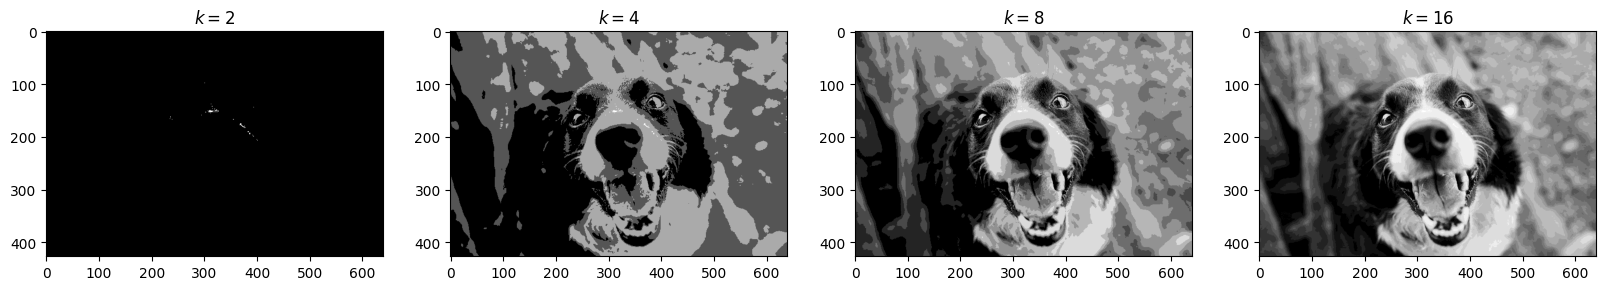

In [15]:
# Membuat faktor kuantisasi
factors = 2**np.arange(1, 5)
# Menyiapkan subplot
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
# Iterasi melalui faktor-faktor kuantisasi
for idx, (k, ax) in enumerate(zip(factors, axis)):
    # Membuat bins dengan k level
    bins = np.linspace(0, image.max(), k) # Synatx: numpy.linspace(start, stop, num=50, endpoint=True , retstep=False, dtype=None, axis=0)
    # print(bins)

    # Kuantisasi gambar ke dalam bins
    quantized_image = np.digitize(image, bins) - 1  # Dikurangi 1 agar hasil sesuai dengan indeks list
    # Membangun ulang gambar kuantisasi
    reconstructed_image = np.take(bins, quantized_image)  # Ambil nilai intensitas dari bins
    # Tampilkan gambar hasil kuantisasi
    ax.imshow(reconstructed_image, cmap='gray')
    ax.set_title(f'$k = {k}$')
plt.show()

Pemrosesan Gambar Dengan Shrinking

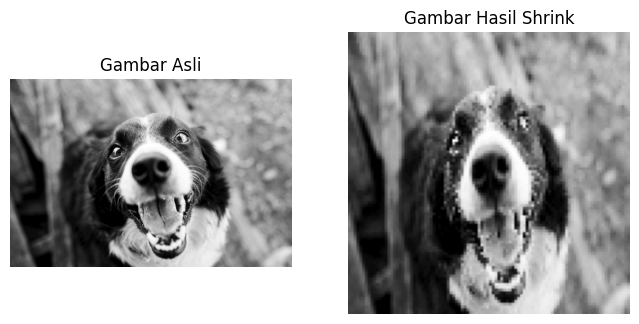

In [16]:
# shrink an image
size = (100, 100)
shrink_image = cv2.resize(image, size, interpolation=cv2.INTER_NEAREST)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(shrink_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

Membandingkan Data Piksel dari Gambar Asli dan Hasil Pemrosesan

In [17]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", shrink_image.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
shrink_pixels = shrink_image[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (10x10 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (10x10 bagian):\n", shrink_pixels)

Original Image Shape:  (427, 640)
Shrink Image Shape:  (100, 100)

Data Piksel Gambar Asli (10x10 bagian):
 [[59 61 61 64 61 64 67 70 72 72]
 [55 59 61 61 61 61 64 64 67 67]
 [51 55 59 59 59 59 59 61 64 64]
 [51 55 55 55 59 59 59 59 61 59]
 [55 55 55 55 55 59 61 59 61 61]
 [55 55 55 55 55 59 59 61 61 61]
 [55 55 55 55 59 59 59 59 61 64]
 [51 51 55 55 59 59 59 55 61 64]
 [55 55 55 55 55 59 61 61 59 61]
 [55 55 55 55 59 59 64 64 61 64]]

Data Piksel Gambar Hasil Shrink (10x10 bagian):
 [[ 59  67  97 130 156 159 162 147 147 153]
 [ 55  61  78 123 150 153 159 138 133 138]
 [ 55  61  67 118 133 162 162 141 114 127]
 [ 64  67  75 114 133 162 156 144 114 118]
 [ 67  64  70  87 135 159 159 147 110 110]
 [ 75  64  70  84 133 153 165 153 118 107]
 [ 81  64  67  75 123 144 159 156 123 101]
 [ 90  70  67  75 101 141 159 159 127  93]
 [104  90  78  75  84 118 144 156 133  90]
 [104  97  87  84  90 104 133 153 133  90]]


Pemrosesan Gambar Dengan Shrinking

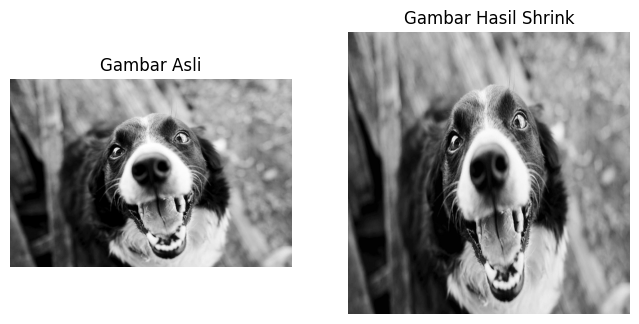

In [18]:
# shrink an image
size = (500, 500)
zoom_image = cv2.resize(image, size, interpolation=cv2.INTER_CUBIC)
plt.figure(figsize=(8,4))
# Subplot for original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Subplot for shrinked image
plt.subplot(1, 2, 2)
plt.imshow(zoom_image, cmap='gray')
plt.title("Gambar Hasil Shrink")
plt.axis('off')

plt.show()

Membandingkan Data Piksel dari Gambar Asli dan Hasil Pemrosesan

In [19]:
# Membandingkan data piksel
print("Original Image Shape: ", image.shape)
print("Shrink Image Shape: ", zoom_image.shape)

# Jika ingin melihat beberapa piksel untuk perbandingan, ambil subset data
original_pixels = image[:10, :10]  # Ambil 5x5 bagian atas dari gambar asli
zoom_image_pixels = zoom_image[:10, :10]  # Ambil 5x5 bagian atas dari gambar shrink

print("\nData Piksel Gambar Asli (10x10 bagian):\n", original_pixels)
print("\nData Piksel Gambar Hasil Shrink (10x10 bagian):\n", zoom_image_pixels)

Original Image Shape:  (427, 640)
Shrink Image Shape:  (500, 500)

Data Piksel Gambar Asli (10x10 bagian):
 [[59 61 61 64 61 64 67 70 72 72]
 [55 59 61 61 61 61 64 64 67 67]
 [51 55 59 59 59 59 59 61 64 64]
 [51 55 55 55 59 59 59 59 61 59]
 [55 55 55 55 55 59 61 59 61 61]
 [55 55 55 55 55 59 59 61 61 61]
 [55 55 55 55 59 59 59 59 61 64]
 [51 51 55 55 59 59 59 55 61 64]
 [55 55 55 55 55 59 61 61 59 61]
 [55 55 55 55 59 59 64 64 61 64]]

Data Piksel Gambar Hasil Shrink (10x10 bagian):
 [[59 61 64 61 65 69 72 73 82 93]
 [57 61 62 61 63 65 68 69 77 90]
 [53 58 60 60 60 61 65 66 72 83]
 [51 56 57 59 59 59 62 61 67 78]
 [53 55 54 58 59 59 60 59 66 76]
 [55 55 55 54 60 60 61 61 66 74]
 [55 55 55 55 59 60 61 61 66 73]
 [55 55 55 59 59 59 61 64 68 71]
 [51 53 55 59 59 56 60 65 69 70]
 [53 54 55 56 60 59 59 62 66 66]]


Setelah melakukan pemrosesan gambar dengan teknik downsampling, kuantisasi, dan shrinking, terdapat perbedaan yang signifikan pada gambar hasil pemrosesan dibandingkan dengan gambar asli. Berikut ini adalah analisis dari setiap proses dan perbandingan data piksel :

1. Downsampling :
Gambar hasil downsampling akan memiliki ukuran yang lebih kecil dan detail yang hilang. Misalnya, jika gambar asli berukuran 1024x768 piksel, setelah downsampling menjadi 512x384 piksel dan beberapa informasi visual akan hilang.
2. Kuantisasi :
Gambar hasil kuantisasi akan memiliki palet warna yang lebih terbatas, mengakibatkan hilangnya detail warna halus. Misalnya, gambar dengan 256 tingkat keabuan dapat dikurangi menjadi hanya 16 tingkat. Gambar yang awalnya halus dan memiliki gradasi warna yang lembut mungkin terlihat lebih "blocky" atau memiliki batasan warna yang jelas.
3. Shrinking :
Gambar hasil shrinking akan lebih kecil dalam dimensi fisik tetapi tetap mempertahankan proporsi aslinya. Namun, detail halus bisa hilang tergantung pada metode shrinking yang digunakan. Gambar asli yang awalnya berukuran 800x600 piksel di-shrink menjadi 400x300 piksel, detail kecil mungkin tidak terlihat jelas lagi.

Perbandingan Data Piksel :
1. Jumlah Piksel: Gambar asli memiliki jumlah piksel lebih banyak dibandingkan dengan hasil downsampling dan shrinking.
2. Tingkat Warna: Gambar asli memiliki rentang warna yang lebih luas dibandingkan dengan hasil kuantisasi.
3. Kualitas Visual: Gambar asli biasanya lebih tajam dan jelas dibandingkan dengan hasil dari ketiga proses tersebut, yang cenderung kehilangan detail.

